## Musterlösung zu Projektaufgabe Deskriptive Statistik und offene Fragen



#### Grundlage: Datensatz der San Francisco Public Library, s.a. https://zbmed.github.io/2023-2024-ZK_Data_Librarian_Modul_3/organisation/dataset/

##### Frage 1: Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

##### Frage 2: Wie viele Nutzer möchten per Mail informiert werden?

##### Frage 3: Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?

##### Frage 4: Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

##### Frage 5: Welche Altersgruppe verlängert im Mittel wie oft?

##### Frage 6: Wie ist die Verteilung der Altersgruppen im Mission District

##### Frage 7: Erklärung von Normalisierung von Kreuztabellen (Kapitel 3 im Skript)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_theme()
# das was wir brauchen in abgekürzter Form

In [2]:
df = pd.read_csv(
    "../data/Library_Usage.csv",
    na_values="none",
     low_memory=False
)
# Einlesen des Datensatzes in das neu definierte DataFrame df mit Überschreibung 
#fehlender Werte

In [3]:
#df
df.head()
#Überblick über das DataFrame

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False


# Frage 1: Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

Um diese Frage zu beantworten, kommen die Spalten "Patron Type Definition" oder "Age Range" in Frage, also schauen wir uns die Einträge (Merkmalsausprägungen) an: 

In [4]:
df['Patron Type Definition'].value_counts()

Adult                  274682
Juvenile                53281
Senior                  49332
Teen                    40561
Welcome                  9966
Digital Access Card      3714
Teacher Card             3234
Staff                     806
Retired Staff             215
Visitor                   148
Library By Mail           120
At User Adult             118
At User Senior             78
At User Welcome            13
At User Teen                8
Business                    7
At User Juvenile            7
Name: Patron Type Definition, dtype: int64

Man sieht, dass es sich um nominale Werte handelt.

In [5]:
df['Age Range'].value_counts()

25 to 34 years       92669
35 to 44 years       81719
10 to 19 years       66857
45 to 54 years       48319
0 to 9 years         32692
65 to 74 years       31714
20 to 24 years       25381
75 years and over    19297
55 to 59 years       19076
60 to 64 years       17654
Name: Age Range, dtype: int64

Man sieht, dass es sich um ordinale Werte handelt.

In der Beschreibung des Datensatzes steht, dass sich die Spalte 'Age Range' nach dem Geburtsdatum richtet. D.h. es ist davon auszugehen, dass die Nutzer der Bibliothek zum Zeitpunkt der Bereitstellung des Datensatzes (2023) in die Kategorien von 'Age Range' einsortiert werden. In der Spalte 'Patron Type Definition' sind verschiedene Merkmalsausprägungen zu finden, die nicht unbedingt etwas mit dem Alter zu tun haben (z.B. VISITOR oder SPECIAL). Daher ist davon auszugehen, dass wir mit 'Age Range' am nähesten Fragestellungen zu Alter beantworten zu können. Richtige Angaben zu tatsächlichem Alter der Nutzer liegen bei diesem Datensatz nicht vor.

An dieser Stelle ist also zu definieren, was Senioren und Kinder sind. Eine Möglichkeit ist, Senioren als Age Range = 65 to 74 years und Age Range = 75 years and over zu definieren, man könnte aber auch Age Range = 60 to 64 years dazunehmen. Für das weitere Vorgehen, definieren wir Senioren als über 65-jährige und Kinder als bis 19-jährige. Um die Frage 1 zu beantworten, reicht es also, die entsprechenden Einträge zu summieren.

In [6]:
kinder=df.loc[df['Age Range'] == "0 to 9 years"] 
kinder=df.loc[
    (df['Age Range'] == "0 to 9 years") | 
    (df['Age Range'] == "10 to 19 years")
] 
#Hilfsvariable

In [7]:
len(kinder) 

99549

In [8]:
senioren=df.loc[
    (df['Age Range'] == "65 to 74 years") | 
    (df['Age Range'] == "75 years and over")
] 
#Hilfsvariable


In [9]:
len(senioren)

51011

# Antwort auf Frage 1:

In [10]:
print('Es sind ' + str(len(kinder)) + ' Kinder (bis 19 Jahre) und ' + str(len(senioren)) + ' Senioren (ab 65 Jahren) registriert.' )


Es sind 99549 Kinder (bis 19 Jahre) und 51011 Senioren (ab 65 Jahren) registriert.


-----

# Frage 2: Wie viele Nutzer möchten per Mail informiert werden?

In [11]:
len(df.loc[(df['Notice Preference Definition'] == "Email")])

393301

# Antwort auf Frage 2:

In [12]:
print(str(len(df.loc[(df['Notice Preference Definition'] == "Email")])) + ' Nutzer möchten per Mail informiert werden.')

393301 Nutzer möchten per Mail informiert werden.


# Frage 3: Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?

Die relevante Spalte über die gewünschte Benachrichtigungsart schauen wir uns genauer an:

In [13]:
df['Notice Preference Definition'].value_counts()

Email    393301
None      42989
Name: Notice Preference Definition, dtype: int64

Es handelt sich um ein nominales Merkmal.

Auch hier stoßen wir auf eine Interpretationsfrage. Da der Datensatz kein Alter ausgibt, sondern nur Altersstufen (Age Range) bzw. Kategorien, die nicht immer etwas mit dem Alter zu tun haben sondern eher mit dem Nutzerstatus (Patron Type Definition), müssen wir überlegen, was ein Durchschnitt bedeuten kann. Age Range ist ein ordinales Merkmal, d.h. wir können keinen Erwartungswert berechnen, aber uns dennoch Häufigkeitstabellen anschauen.

Um diese beiden Merkmale (nominal und ordinal) zu verbinden, können wir uns einen Plot angucken, dafür definieren wir eine neue Variable indem wir nach den Merkmalen filtern, die uns interessieren:

In [14]:
benachrichtigung=df.loc[
    (df['Notice Preference Definition'] == "Email") | 
    (df['Notice Preference Definition'] == "None")
] #Hilfsvariable für den Plot, damit nur die Merkmale 'email' und 'print' angezeigt werden

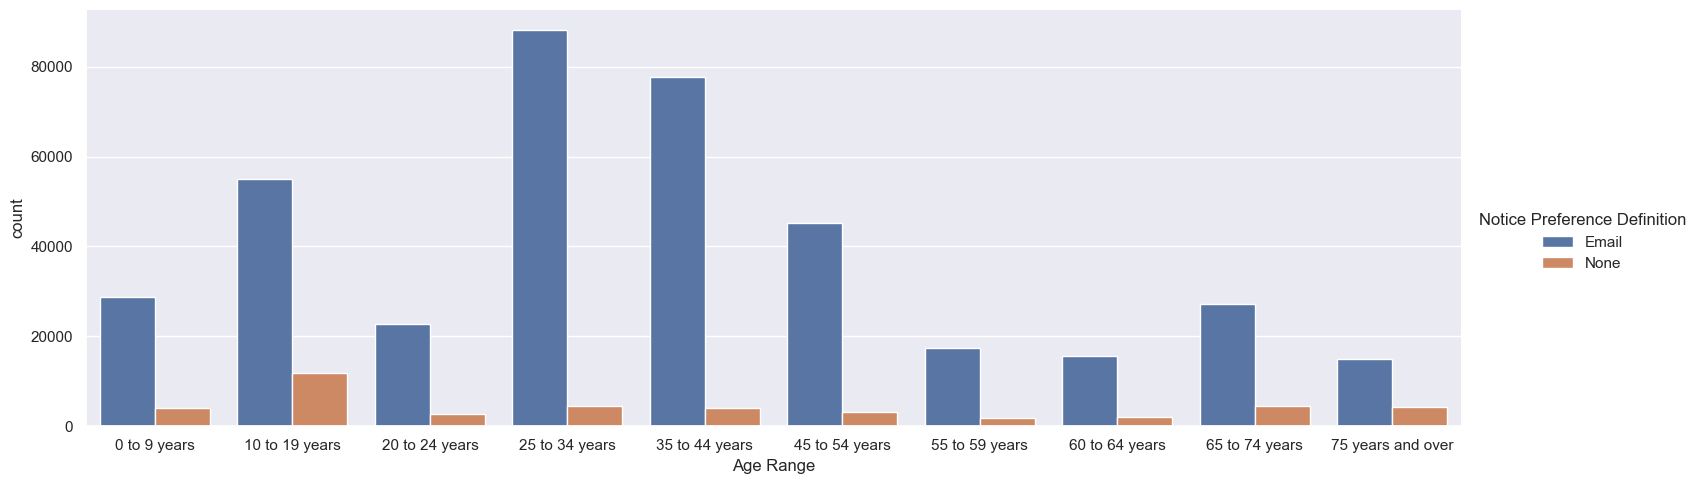

In [15]:
sns.catplot(x='Age Range', kind='count', hue='Notice Preference Definition', data=benachrichtigung, aspect=3, order=["0 to 9 years","10 to 19 years","20 to 24 years","25 to 34 years","35 to 44 years","45 to 54 years","55 to 59 years","60 to 64 years","65 to 74 years","75 years and over"])
#wenn data=df gewählt wird, würden wir auch die Werte für 'print' sehen

Um besser die Zahlen zu verstehen, hilft uns eine Kreuztabelle:

In [16]:
pd.crosstab(
    benachrichtigung['Notice Preference Definition'],
    benachrichtigung['Age Range'],
    margins=True
)
# Beachte, dass wir hier eine Teilmenge des Datensatzes betrachten über die Variable "benachrichitigung". 
# D.h. wir blenden die Ereignisse aus, wo in der Spalte 'Notice Preference Definition' nicht 
# 'Email' oder 'Print' steht.

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Notice Preference Definition,,,,,,,,,,,
Email,28740,54936,22701,88200,77618,45165,17336,15539,27170,15069,392474
None,3952,11921,2680,4469,4101,3154,1740,2115,4544,4228,42904
All,32692,66857,25381,92669,81719,48319,19076,17654,31714,19297,435378


----
###### WICHTIG:
Beachte, dass die Summe der Nutzer, die per Mail informiert werden hier 392474 ergibt. Wir haben aber bei Frage 2 festgestellt, dass eigentlich 393301 Nutzer per Mail informiert werden möchten.
Dies liegt daran, dass offensichtlich in einigen Einträgen (Zeilen des Datensatzes) zwar im Feld "Notice Preference Definition" der Wert "Email" steht, aber offensichtlich im Feld "Age Range" kein Eintrag steht. In der Kreuztabelle werden die beiden Merkmale 'Age Range' und 'Notice Preference Definition' betrachtet und somit nur die Einträge, wo entsprechednd beide Felder ausgefüllt sind.

(Das ist übrigens unabhängig ob man die Kreuztabelle über die "große" Variable "df" oder "benachrichtigung" berechnet, probiere es gerne aus!)

----

In [17]:
# Nun möchten wir das prozentual betrachten:
pd.crosstab(
    benachrichtigung['Notice Preference Definition'],
    benachrichtigung['Age Range'],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Notice Preference Definition,,,,,,,,,,
Email,0.073228,0.139974,0.057841,0.224728,0.197766,0.115078,0.044171,0.039592,0.069228,0.038395
None,0.092113,0.277853,0.062465,0.104163,0.095585,0.073513,0.040556,0.049296,0.105911,0.098546
All,0.075089,0.153561,0.058296,0.212847,0.187697,0.110982,0.043815,0.040549,0.072842,0.044322


# Antwort auf Frage 3:

 Die Frage können wir wie folgt beantworten. 
 Von allen Nutzern, die per Mail informiert werden möchten, sind
 - ca. 7%  in der Alterklasse 0 bis 9 Jahre,
 - ca. 14% in der Altersklasse 10 bis 19 Jahre,
 
 ...
 
 - ca. 7%  in der Altersklasse 65 bis 74 Jahre,
 - ca. 4%  in der Altersklasse 75 Jahre und älter.

Im Vergleich dazu, sind von allen Nutzern, die nicht informiert werden möchten
- ca. 9%  in der Altersklasse 0 bis 9 Jahre,
- ca. 28%  in der Altersklasse 10 bis 19 Jahre,

...

- ca. 11%  in der Altersklasse 65 bis 74 Jahre,
- ca. 10%  in der Altersklasse 75 Jahre und älter.


# Frage 4: Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

Für diese Fragestellung sind die Spalten 'Total Checkouts' und 'Age Range' relevant. Bei der ersten handelt es sich um ein metrisches Merkmal, die zweite ist ordinal.
Wir definieren eine neue Spalte, die die durchschnittliche jährliche Ausleihe eines Nutzers ausgibt.


In [18]:
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')
df['Membership Duration Years'] = (df['Circulation Active Year'] - df['Year Patron Registered'])+1 
# hier werden der Einfachheit ganze Jahre angenommen
df["Average Checkouts per Year"] =(df['Total Checkouts']/df['Membership Duration Years'])


In [19]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Membership Duration Years,Average Checkouts per Year
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False,21.0,2.523810
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False,21.0,22.857143
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False,13.0,5.384615
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False,21.0,187.333333
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False,21.0,53.238095


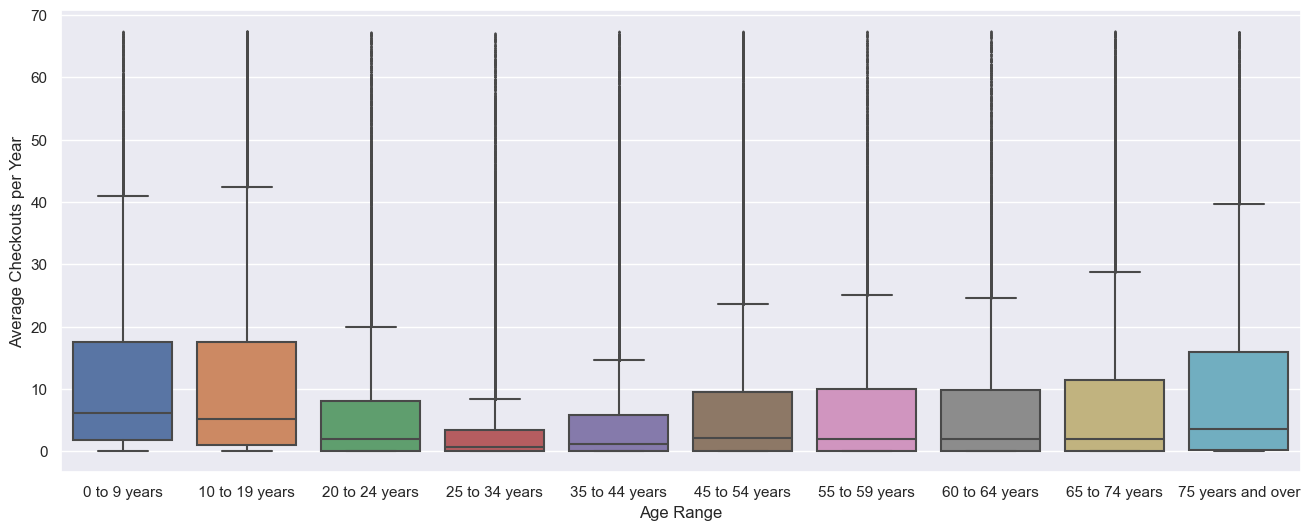

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()
plt.figure(figsize=(16, 6))
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']

plt = sns.boxplot(y='Average Checkouts per Year', x='Age Range', data=df[df['Average Checkouts per Year']<df['Average Checkouts per Year'].quantile(0.95)], fliersize=0.5, whis=1.5, order =my_order)

# Antwort auf Frage 4: 

In der Grafik ist die Antwort ablesbar. Man sieht  ganz schön, dass es kaum Zusammenhang zwischen der durschnittlichen Ausleihe pro Jahr und den Altersgruppen gibt. Lediglich die Altersgruppe zwischen 25 und 34 und 35 und 44 leihen sichtbar weniger Bücher aus als die anderen Altersgruppen.

# Frage 5: Welche Altersgruppe verlängert im Mittel wie oft?

# Antwort auf Frage 5

Wie in Frage 4 benötigen wir eine Hilfsvariable.

In [21]:
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')
df['Membership Duration Years'] = (df['Circulation Active Year'] - df['Year Patron Registered'])+1 
# hier werden der Einfachheit ganze Jahre angenommen
df["Average Renewals per Year"] =(df['Total Checkouts']/df['Membership Duration Years'])

In [22]:
Age_Range_0_9 = df.loc[df['Age Range'] == '0 to 9 years']
Age_Range_10_19 = df.loc[df['Age Range'] == '10 to 19 years']
Age_Range_20_24 = df.loc[df['Age Range'] == '20 to 24 years']
Age_Range_25_34 = df.loc[df['Age Range'] == '25 to 34 years']
Age_Range_35_44 = df.loc[df['Age Range'] == '35 to 44 years']
Age_Range_45_54 = df.loc[df['Age Range'] == '45 to 54 years']
Age_Range_55_59 = df.loc[df['Age Range'] == '55 to 59 years']
Age_Range_60_64 = df.loc[df['Age Range'] == '60 to 64 years']
Age_Range_65_74 = df.loc[df['Age Range'] == '65 to 74 years']
Age_Range_75 = df.loc[df['Age Range'] == '75 years and over']

# Hilfsvariablen

print('Im Mittel werden in den Altersgruppen wie folgt Verlängerungen getätigt:' )
print('0 bis 9-jährige: '  + str(Age_Range_0_9['Average Renewals per Year'].mean()))
print('10 bis 19-jährige: '  + str(Age_Range_10_19['Average Renewals per Year'].mean()))

print('...')


print('65 bis 74-jährige: '  + str(Age_Range_65_74['Average Renewals per Year'].mean()))
print('ab 75-jährige: '  + str(Age_Range_75['Average Renewals per Year'].mean()))




Im Mittel werden in den Altersgruppen wie folgt Verlängerungen getätigt:
0 bis 9-jährige: 20.67787896079863
10 bis 19-jährige: 22.311279378051168
...
65 bis 74-jährige: 22.143589378726553
ab 75-jährige: 25.564645418763174


----

# Frage 6: Wie ist die Verteilung der Altersgruppen im Mission District

Für diese Frage sind die Variablen 'Home Library Definition' und 'Age Range' relevant. Die erstere ist nominal, die zweite ordinal. D.h. auch hier ist die Berechnung von Erwartungswert und Varianz nicht möglich. Für einen ersten graphischen Überblick können wir aber einfach zählen, wie viele Nutzer welcher Altersgruppe im Mission District sind.

In [23]:
mission_district=df.loc[(df['Home Library Definition'] == "Mission")] # Hilfsvariable

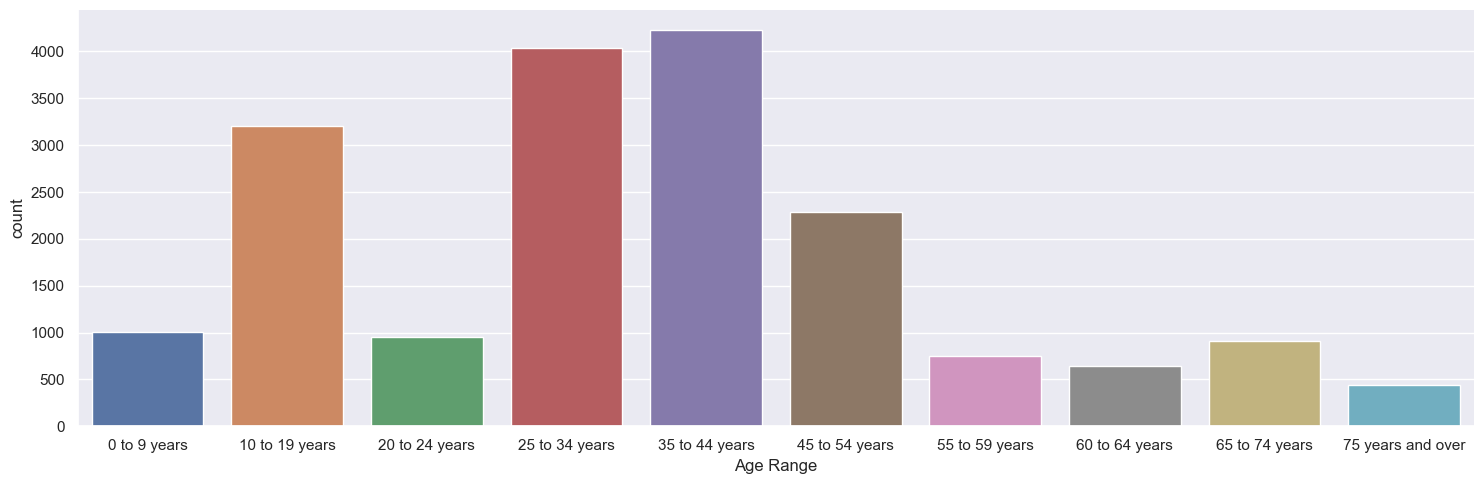

In [24]:
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.catplot(x='Age Range', kind="count", data=mission_district, order=my_order, aspect=3)

Die obere Grafik beantwortet die Frage schon ganz gut, dennoch können wir uns auch die genauen Werte über eine Kreuztabelle ausgeben lassen:

In [25]:
pd.crosstab(
    mission_district['Home Library Definition'],
    mission_district['Age Range'],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Mission,0.054378,0.173489,0.05183,0.218813,0.229385,0.123936,0.040607,0.034698,0.049119,0.023746
All,0.054378,0.173489,0.05183,0.218813,0.229385,0.123936,0.040607,0.034698,0.049119,0.023746


###### Antwort auf Frage 6
Die Verteilung der Altersgruppen im Mission District ist wie folgt:
- ca. 5% der Nutzer sind zwischen 0 und 9 Jahren,
- ca. 17% der Nutzer sind zwischen 10 und 19 Jahren,
 
...

- ca. 5% der Nutzer sind zwischen 65 und 74 Jahren,
- ca. 2% der Nutzer sind 75 Jahre und älter.


----

# Frage 7: Erklärung von Normalisierung von Kreuztabellen (Kapitel 3 im Skript)

Wir nutzen das Beispiel von oben (Alterskategorien und Benachrichtigungsart aus Frage 3).
Zuerst einmal eine nicht normalisierte Kreuztabelle:

In [26]:
# Nun möchten wir das prozentual betrachten:
pd.crosstab(
    benachrichtigung['Notice Preference Definition'],
    benachrichtigung['Age Range'],
    margins=True
)
# die Reihenfolge der betrachteten Spalten 'Notice Preference Definition' und 'Age Range' spielt keine Rolle, 
# probiere es ruhig aus"

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Notice Preference Definition,,,,,,,,,,,
Email,28740,54936,22701,88200,77618,45165,17336,15539,27170,15069,392474
None,3952,11921,2680,4469,4101,3154,1740,2115,4544,4228,42904
All,32692,66857,25381,92669,81719,48319,19076,17654,31714,19297,435378


In [31]:
# Nun normalisieren wir nach Zeilen (normalize=0)
pd.crosstab(
    benachrichtigung['Notice Preference Definition'],
    benachrichtigung['Age Range'],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Notice Preference Definition,,,,,,,,,,
Email,0.073228,0.139974,0.057841,0.224728,0.197766,0.115078,0.044171,0.039592,0.069228,0.038395
None,0.092113,0.277853,0.062465,0.104163,0.095585,0.073513,0.040556,0.049296,0.105911,0.098546
All,0.075089,0.153561,0.058296,0.212847,0.187697,0.110982,0.043815,0.040549,0.072842,0.044322


Hier sehen wir, dass jede Zeile in der Summe 1 ergibt. D.h. wir können die Tabelle prozentual nach Zeilen interpretieren.
Also z.B. erste Zeile: Von allen Nutzern, die per Mail informiert werden möchten, befinden sich ca. 12% (0.115078 von 1) in der Altersgruppe 45 bis 54 Jahre.


In [28]:
# Als Vergleich normalisieren wir nach Spalten (normalize=1)
pd.crosstab(
    benachrichtigung['Notice Preference Definition'],
    benachrichtigung['Age Range'],
    margins=True, normalize=1
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Notice Preference Definition,,,,,,,,,,,
Email,0.879114,0.821694,0.894409,0.951775,0.949816,0.934725,0.908786,0.880197,0.856719,0.780899,0.901456
None,0.120886,0.178306,0.105591,0.048225,0.050184,0.065275,0.091214,0.119803,0.143281,0.219101,0.098544


Hier sehen wir, dass jede Spalte in der Summe 1 ergibt. D.h. wir können die Tabelle prozentual nach Spalten interpretieren.
Also z.B. erste Spalte: Von allen Nutzern, die zwischen 0 und 9 Jahren sind, möchten sich ca. 12% (0.120886 von 1) nicht informieren lassen.


----